## Grace Kaur's Portfolio

## Table of Contents:

[Overview](#Overview)

[Project 1](#Project-1)

[Project 2](#Project-2)

[Project 3](#Project-3)

[Reflections](#Reflections)

[C programming](#C-programming)

[Bash Scripting](#Bash-Scripting)

[LaTeX](#LaTeX)

[Markdown Jupyter notebooks cheatsheet](#Markdown-Jupyter-notebooks-cheatsheet)

[Generative AI tools](#Generative-AI-tools)

[Citations](#Citations)




## Overview

I am a Psychology and Computer Science major, in my future porjects I would like to combine my passion for the mind and brian with technical skills to create meaningful, data-driven solutions. Throughout my coursework in data structures, algorithms, and human-computer interaction, I’ve developed a solid foundation in programming and problem-solving.

Currently, I am honing my skills in HTML/CSS, and SQL while also exploring tools like Git, Unix and Bash. With practical experience in managing web performance, and handling complex datasets, I am eager to apply my skills in an internship that challenges me to contribute to real-world projects while continuing to grow as a developer and data analyst.

This portfolio showcases my technical work, projects, and insights, reflecting my drive to combine creativity and analytics in technology.


# Project 1

In this project, I worked with YAML files, extracting data and transforming it into bar graphs and pie charts. Initially, I faced challenges in reading and processing YAML files correctly and ensuring that the generated visualizations were clear and presentable, but I learned a lot while navigating through the code to improve the presentation.

```python

def barGraph(data: Dict[str, int], pTitle: str, xTitle: str, yTitle: str, filename: str) -> None:
    """
    Generates a bar graph based on given data.
    
    Parameters
    ----------
    data : dict
        Dictionary containing data to be plotted (keys as x-axis, values as y-axis).
    pTitle : str
        Title of the graph.
    xTitle : str
        Label for the x-axis.
    yTitle : str
        Label for the y-axis.
    filename : str
        Filename to save the generated graph.
    
    Returns
    -------
    None
    """
    x_label = list(data.keys())
    y_label = list(data.values())
    plt.bar(x_label, y_label)
    plt.title(pTitle)
    plt.xlabel(xTitle)
    plt.ylabel(yTitle)
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()


def pieGraph(data: Dict[str, int], pTitle: str, filename: str) -> None:
    """
    Generates a pie chart based on given data.
    
    Parameters
    ----------
    data : dict
        Dictionary containing data to be plotted (keys as labels, values as data slices).
    pTitle : str
        Title of the pie chart.
    filename : str
        Filename to save the generated chart.
    
    Returns
    -------
    None
    """
    plt.figure(figsize=(8, 6))
    plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(pTitle)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()
```

# Project 2

In this project, I explored common pointer errors and memory management issues in C, particularly while handling linked lists and file I/O. Some challenges I encountered included ensuring proper memory allocation (malloc checks), preventing dangling pointers, and managing buffer overflows when working with string operations.

One key takeaway was learning to validate memory allocation, avoid using freed pointers, and ensure proper buffer sizing to prevent memory leaks and undefined behavior. The project also involved implementing CSV file writing from a linked list, showcasing best practices in handling dynamic memory safely.


```c

/**
 * @brief Writes data from a linked list to a CSV file named "output.csv".
 *
 * Writes each node's word and count as rows in the CSV file, escaping double quotes in words.
 *
 * @param head Pointer to the head of the linked list containing data to write.
 * @param n Number of nodes to write to the CSV file.
 */

void writeCSV(node_t *head, int n) {
    FILE *file;
    file = fopen("output.csv", "w");
    fprintf(file, "subject,statistic\n");
    for (int i = 1; i <= n; i++) {
        fprintf(file, "\"%s\",%d\n", escapeQuotes(head->word), head->cnt);
        head = head->next;
    }
}

```

Here is an example of one of the questions I had to solve in assignment 3: 


```c

/**
 * solveQ2 : Solves the second question.
 *
 * @param data : the filename.
 * @param n : The number of lines needed in the output csv file.
 *
 */


void solveQ2(char data[], int n) {
    node_t *routes = NULL;
    char *line = (char *)malloc(sizeof(char) * MAX_LINE_LEN);
    FILE* file = fopen(data, "r");
    char *dest_country = (char *)malloc(sizeof(char) * MAX_LINE_LEN);
    int line_cnt = 0;
    while (fgets(line, MAX_LINE_LEN, file) != NULL) {
        line[strcspn(line, "\r\n")] = '\0';
        if (!strcmp(line, "routes:"))
            continue;
        char *token = strtok(line, ":");
        char *tmp = (char *)malloc(sizeof(char) * strlen(token));
        if (line_cnt == 10) {
            token = strtok(NULL, "");
            tmp = removeChar(token);
            tmp = removeLeadingWhitespace(tmp);
            strcpy(dest_country, tmp);
            routes = addValue(routes, dest_country);
        }
        line_cnt ++;
        if (line_cnt == 13)     line_cnt = 0;
        free(tmp);
    }
    node_t *head = routes;
    routes = head;

    free(dest_country);
    free(line);
    fclose(file);
    while (routes != NULL) {
        routes->cnt *= -1;
        routes = routes->next;
    }
    routes = head;
    sort(&routes);
    head = routes;
    while (routes != NULL) {
        routes->cnt *= -1;
        routes = routes->next;
    }
    routes = head;
    writeCSV(routes, n);
}



```



# Project 3

Out of all the projects I enjoyed this one the most, but I faced a lot of challenges and learnt a lot fixing them. 

`Understanding SVG Path Syntax:`

SVG paths use a specific syntax for drawing shapes, which can be complex. Understanding commands like M, L, C, and how they combine to form shapes requires careful study and practice.


`Managing Coordinates and Sizes:`

Positioning and scaling shapes accurately might be tricky, especially when dealing with different coordinate systems or trying to ensure shapes are correctly aligned and sized.

`Generating Random Art:`

Randomly generating shapes with specific constraints, like ensuring they fit within the canvas or don't overlap undesirably, can be complex. Balancing randomness with aesthetic appeal might require tuning and iteration.

`Integrating Multiple Components:`

Combining different parts of the project, such as integrating the heart shape with other shapes or ensuring the HTML structure is correct, can lead to issues like incorrect paths or HTML syntax errors.

`Debugging SVG Output:`

Unlike traditional programming, where you can use print statements or debuggers, debugging SVG output is visual and often requires you to carefully inspect the rendered output in a browser.

`Performance Considerations:`

If the number of shapes generated is large, ensuring that the program runs efficiently and the SVG files generated are not too large for browsers to handle smoothly could be a concern.

`Balancing Aesthetic with Functionality:`

Ensuring the generated art looks good while still meeting the technical requirements can be challenging, especially when working with random generation.

```python

  def __str__(self) -> str:
        """
        Creates an HTML line for a heart with the given specifications.

        Returns:
            str: The created HTML line.
        """
        scale_factor = 0.5  # Adjust this factor to control the size of the heart
        scaled_size = self.size * scale_factor

        # Calculate the coordinates for SVG path data
        x_center = self.cor.x
        y_center = self.cor.y
        x_left = x_center - scaled_size
        x_right = x_center + scaled_size
        y_top = y_center - scaled_size
        y_bottom = y_center + scaled_size

        path_data = (
            f"M {x_center} {y_bottom} "
            f"L {x_left} {y_top} "
            f"C {x_left} {y_top} {x_center - scaled_size * 0.5} {y_center - scaled_size} {x_center} {y_center} "
            f"C {x_center + scaled_size * 0.5} {y_center - scaled_size} {x_right} {y_top} {x_right} {y_top} "
            f"Z"
        )

        # Convert the Color object to an appropriate color string
        color_str = f'rgb({self.color.r},{self.color.g},{self.color.b})'

        return f'<path d="{path_data}" fill="{color_str}" stroke="{color_str}" stroke-width="5" />\n'

```

## Reflections


`Most Valuable Skills:`

1. C Programming: Fundamental for understanding low-level programming, memory management, and systems programming.
2. Python: Versatile and widely used for scripting, automation, web development, and data analysis.
3. Unix and Bash: Essential for working in Linux environments, scripting, and automating tasks.
4. Make: Important for understanding build automation and managing project dependencies in C/C++ projects.
5. Pipes & Filters: Useful for processing and transforming data streams in Unix environments.
6. SVG & HTML: Valuable for web development, especially for creating custom graphics and understanding web technologies.
7. Static & Dynamic Data Structures: Core computer science concepts that are crucial for writing efficient algorithms.
8. Testing & Debugging: Critical skills for ensuring software quality and reliability.
9. Logging: Important for monitoring applications and troubleshooting issues in production environments.
10. Text Processing: Useful for handling and transforming large text files, often used in data processing and analysis.

`Resume Additions:`

* Proficiency in C and Python for systems and application programming.
* Experience with Unix/Linux environments and Bash scripting.
* Knowledge of build automation tools like Make.
* Understanding of SVG and HTML for web development and custom graphics creation.
* Strong grasp of data structures and algorithms.
* Experience with software testing, debugging, and logging.
* Text processing skills using command-line tools and scripting languages.

`Personal Insights`

**Understanding Pointers and Memory Management:**
* Realizing how pointers directly manipulate memory and the impact of memory leaks or buffer overflows on program stability.

**Mastering Dynamic Data Structures:**
* Gaining insight into how dynamic data structures like linked lists, stacks, and queues function and how they can be implemented in C.

**Comprehending File I/O:**
* Experiencing the simplicity and power of file handling in C, and understanding how to efficiently read from and write to files.

**Grasping the Unix Environment:**
* Discovering how Unix commands, pipes, and filters can be used to create powerful command-line tools and how they interact with system-level programming.

**Seeing the Value of Testing and Debugging:**
* Realizing the importance of systematic testing and debugging techniques to find and fix bugs in complex systems programs.


`Python libraries`

**NumPy:**
* Purpose: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* Use Case: Ideal for numerical computations and scientific computing.

**Pandas:**
* Purpose: Offers data structures and data analysis tools for handling structured data, including DataFrames for tabular data.
* Use Case: Used for data manipulation, analysis, and cleaning.

**Requests:**
* Purpose: Simplifies making HTTP requests and handling responses.
* Use Case: Commonly used for interacting with web APIs and handling HTTP requests.

**Matplotlib:**
* Purpose: A plotting library for creating static, interactive, and animated visualizations in Python.
Use Case: Ideal for data visualization and plotting graphs and charts.

**Scikit-learn:**
* Purpose: Provides simple and efficient tools for data mining and data analysis, including a range of machine learning algorithms.
* Use Case: Used for implementing and evaluating machine learning models.


`Typing and Typing Hints in Python:`

* Typing in Python: Python is dynamically typed, meaning variable types are determined at runtime, allowing flexibility but risking runtime errors.

* Typing Hints: Introduced in Python 3.5, typing hints allow developers to annotate code with expected types, improving code clarity, enabling early error detection with tools like mypy, and enhancing IDE support.

`Rust’s Popularity and the Role of Typing:`

* Reasons for Rust's Popularity:
    * Memory Safety: Rust's ownership model prevents common bugs, making it safe for concurrent programming.
    * Performance: Offers C/C++ level performance with safer abstractions.
    * Modern Features: Rust includes pattern matching, generics, and traits, appealing to developers.
    * Concurrency: Rust's design makes it easier to write safe concurrent code.
* Role of Typing: Rust's strong static typing ensures type safety at compile time, preventing many errors before execution. Its type inference and robust type system contribute to its appeal by balancing safety with usability.

`Slicing:`

Concept: Extracts a portion of a sequence using sequence `[start:stop:step]`.

```python
my_list = [0, 1, 2, 3, 4, 5]
sliced = my_list[1:4]  # Result: [1, 2, 3]

```
Use: Accessing subarrays, reversing sequences, etc.

`Comprehensions:`

Concept: A concise way to create sequences by iterating over existing ones.

```python

squares = [x**2 for x in range(5)]  # Result: [0, 1, 4, 9, 16]
```

Use: Quickly generate lists, sets, or dictionaries.

`Loops vs. Slicing & Comprehensions:`
Limitations: Not all loops can be replaced by slicing or comprehensions, especially those with complex logic or operations on non-sequence data.

`Pythonic Code:`
* Follows Python’s idiomatic practices.
* Readable, simple, and efficient.
* Uses built-in functions, comprehensions, and context managers.

`squares = [x**2 for x in range(10)]`

`Non-Pythonic Code:`
* Doesn't follow Python's idioms.
* More complex, verbose, or less efficient.
* Avoids Python-specific features.

```python
squares = []
for x in range(10):
    squares.append(x**2)

```

`Object & Class Variables and Methods:`

* Object Variables: Unique to each instance (self.name).
*  Class Variables: Shared among all instances (Person.population).
*  Object Methods: Operate on instance data (get_name()).
*  Class Methods: Operate on class-level data, marked with @classmethod (from_birth_year()).

`Python Logging Module:`

* Concept: Provides a way to record log messages.
* Purpose: Helps with debugging, monitoring, and auditing.
* Usage: Supports log levels (DEBUG, INFO, etc.) and customizable outputs.

`Tacit Knowledge in Requirements Engineering & Job Interviews:`

*  Concept: Unwritten, experience-based knowledge.
*  Requirements Engineering: Captures unstated needs.
*  Job Interviews: Reflects practical, hands-on understanding.

`Deep Copy and Shallow Copy in Python:`

*  Shallow Copy: Copies the object but not nested objects (copy.copy()).
*  Deep Copy: Recursively copies all nested objects (copy.deepcopy()). 
*  __copy__() and __deepcopy__() Methods: Customize how objects are copied.

`PEP 8`

* PEP 8 is the style guide for Python code that promotes readability and consistency.
* It covers guidelines for indentation (4 spaces), line length (79 characters), naming conventions (e.g., snake_case for variables, CamelCase for classes), and proper use of whitespace. 
* Following PEP 8 helps ensure Python code is clean and maintainable.

## C-programming 

In [ ]:
#include <stdio.h>

int main() {
    // DATA TYPES

    int num = 15;
    float decimal = 7.346;
    char letter = 'A';
    
    printf("Integer: %d\n", num);
    printf("Float: %.2f\n", decimal);
    printf("Character: %c\n", letter);
    
    // LOOPS

    int i;
    
    // For loop
    for (i = 1; i <= 5; i++) {
        printf("%d ", i);
    }
    printf("\n");
    
    // While loop
    i = 1;
    while (i <= 5) {
        printf("%d ", i);
        i++;
    }
    printf("\n");
    
    return 0;

}

In [11]:
%%bash 
gcc c_program.c -g -o c_program

In [12]:
%%bash 
./c_program

Integer: 15
Float: 7.35
Character: A
1 2 3 4 5 
1 2 3 4 5 


## Bash Scripting

#### Some important Bash Commands 

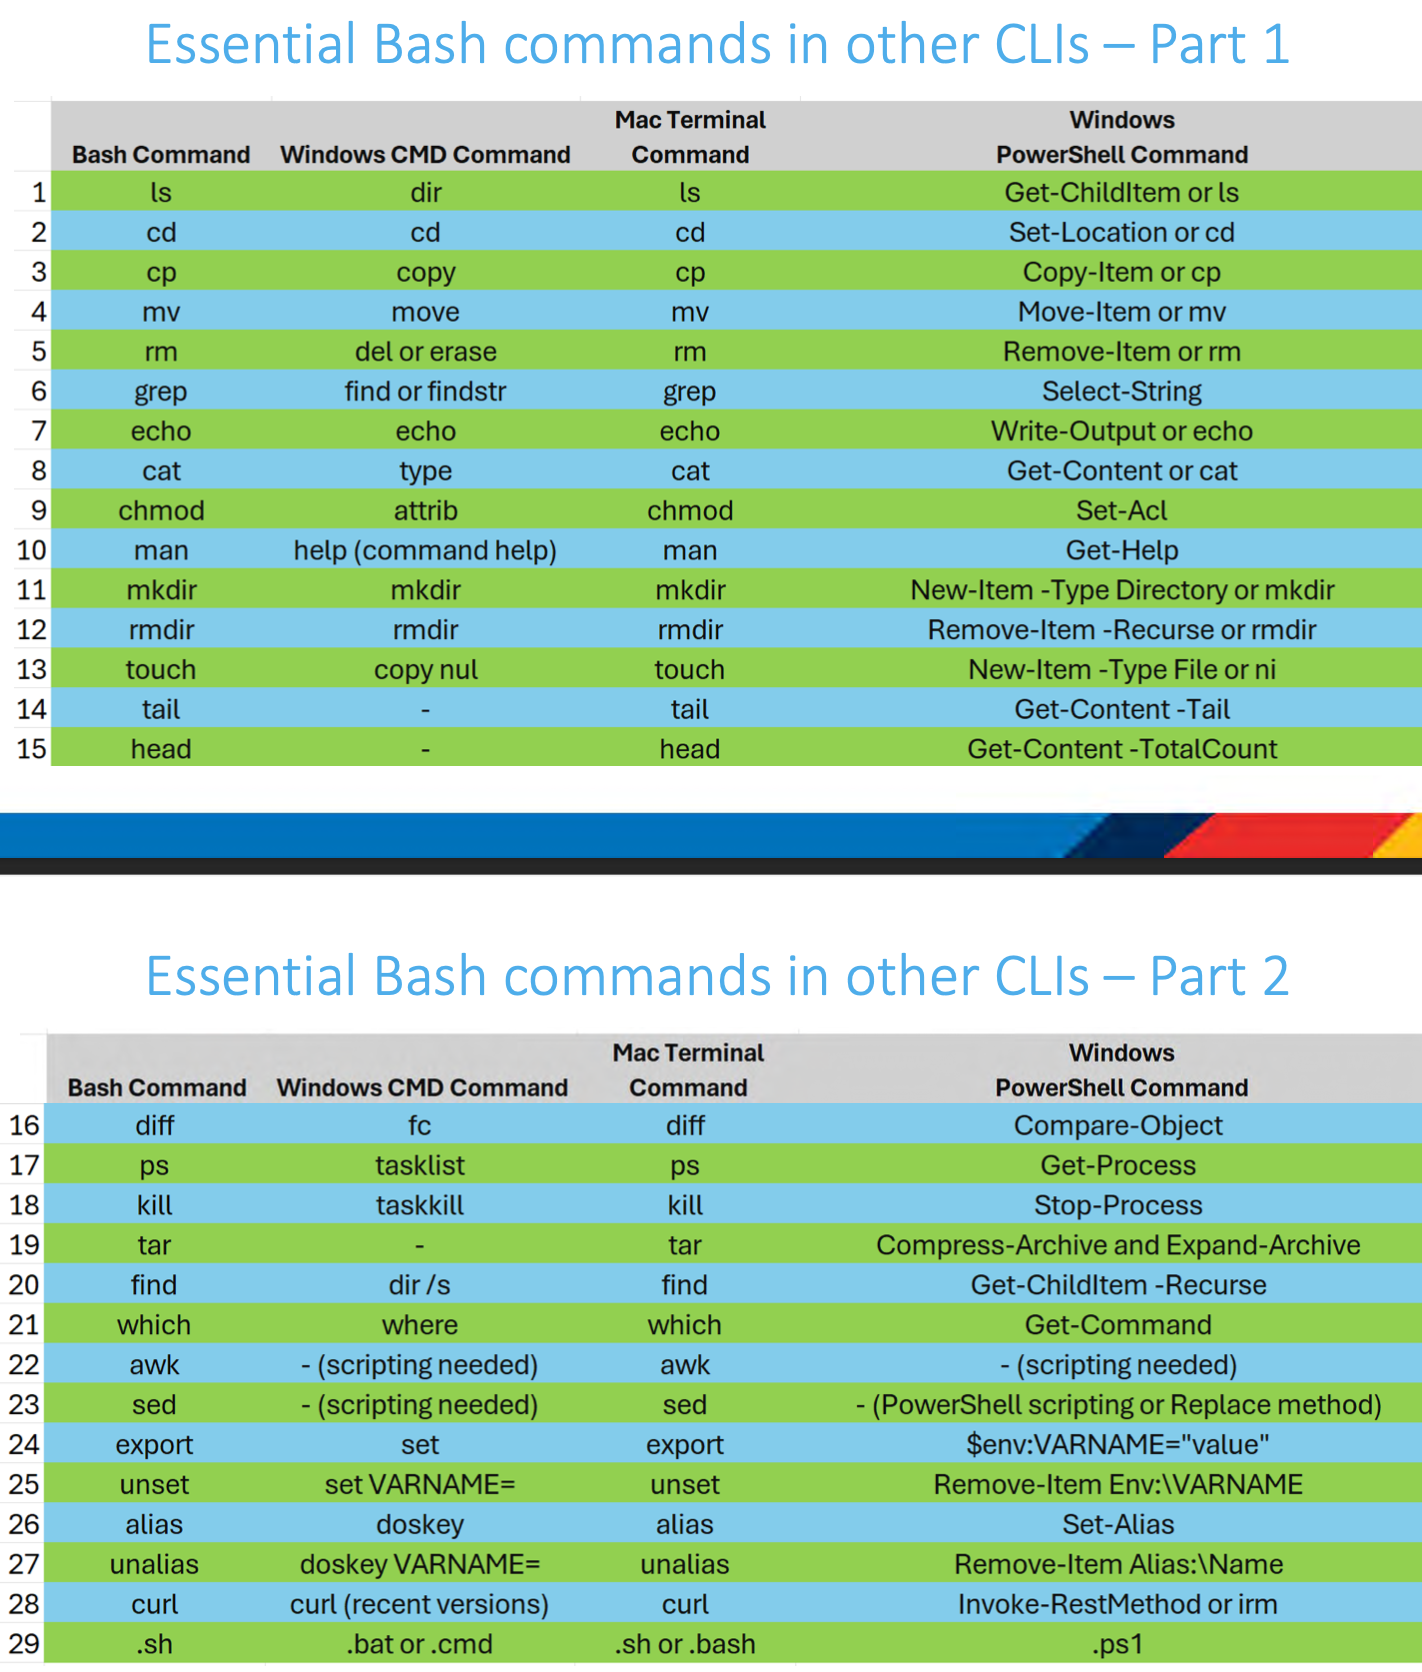



#### Ways to add files to local computer and push files to repository

git clone <url>

git add <file> \ git add . \ git add -A

git commit -m “<message>”

git push

git pull

git status

# Unix Operating

#### Useful commands used when editing through the terminal 

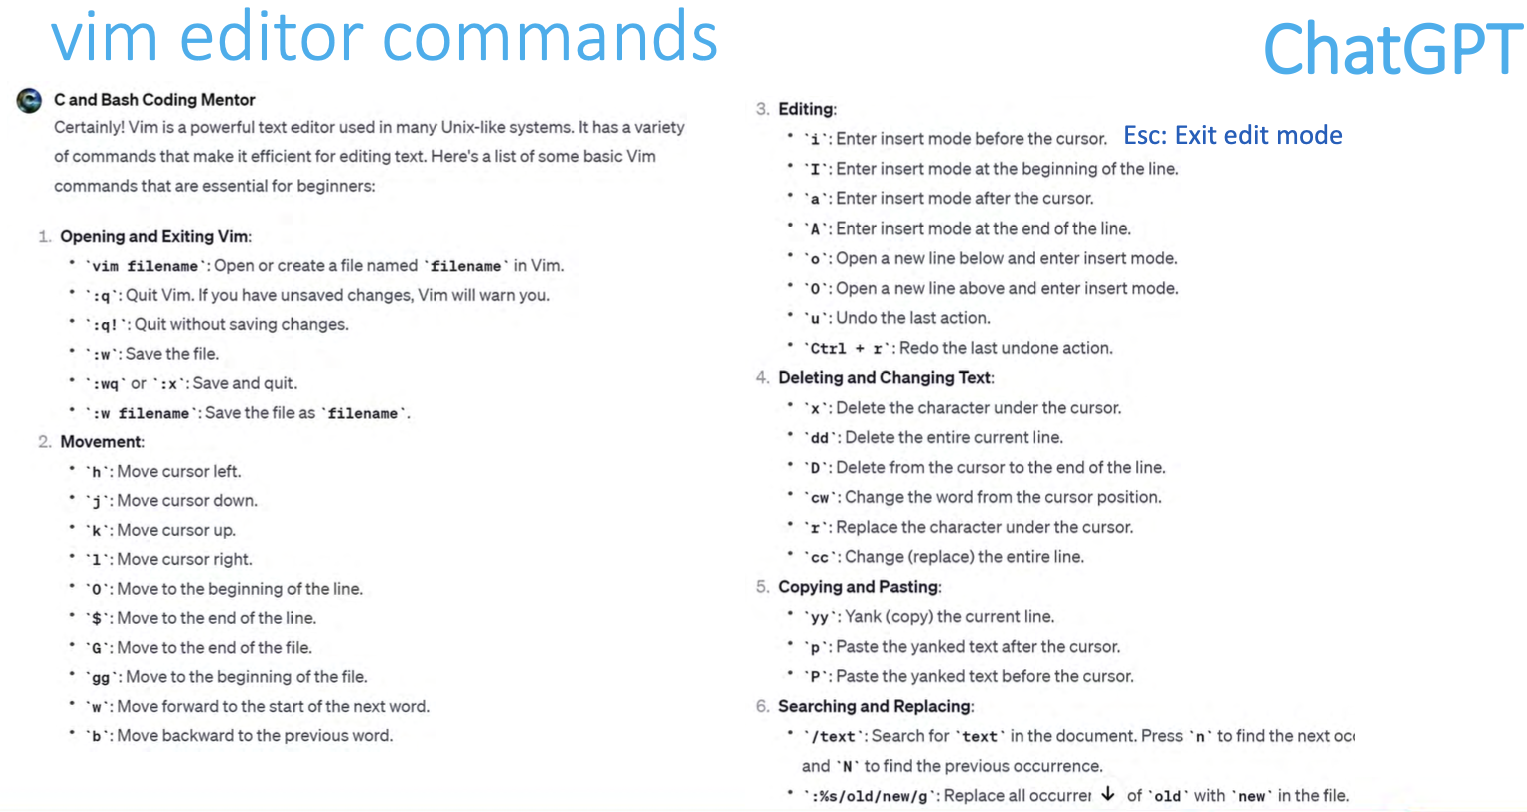

# LaTeX 

### Equations

\begin{align*}
  f(x) &= x^2\\
  g(x) &= \frac{1}{x}\\
  F(x) &= \int^a_b \frac{1}{3}x^3
\end{align*}
$$P \left( A=2 \, \middle| \, \dfrac{A^2}{B}>4 \right)$$

$$\mathrm{e} = \sum_{n=0}^{\infty} \dfrac{1}{n!}$$

$$\prod_{i=1}^{n} x_i - 1$$

$$
M = 
\begin{bmatrix}
\frac{5}{6} & \frac{1}{6} & 0 \\[0.3em]
\frac{5}{6} & 0 & \frac{1}{6} \\[0.3em]
0 & \frac{5}{6} & \frac{1}{6}
\end{bmatrix}
$$

$$
A_{m,n} = 
\begin{pmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m,1} & a_{m,2} & \cdots & a_{m,n} 
\end{pmatrix}
$$

## Markdown Jupyter notebooks cheatsheet

Headings:

Use the number sign (#) for titles and section headings:

    # for titles
    ## for major headings
    ### for subheadings
    #### for 4th level subheadings

Emphasis:

    Bold text: __string__ or **string**

Monospace font:
`string`

Indenting:
> Text that will be indented when the Markdown is rendered.

Colored note boxes:
* Blue boxes (alert-info)

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes for tips and notes. 
</div>

* Yellow boxes (alert-warning)

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

* Green boxes (alert-success)

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

* Red boxes (alert-danger)

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

Horizontal lines:

On a new line, enter three asterisks:

***
***
***


# Generative AI tools

#### A few AI tools I started using other than Chat GPT: 

https://www.perplexity.ai/

https://www.ibm.com/watsonx

https://gemini.google.com/app

https://www.llama2.ai/

https://www.anthropic.com/news/claude-2

https://stability.ai/


# Citations

ChatGPT: used to answer some of the provided questions.

Perpelexity: used to answer some of the provided questions.

https://www.youtube.com/watch?v=triTgcyF_IA&t=472s

https://www.geeksforgeeks.org/insert-image-in-a-jupyter-notebook/

https://shalb.com/blog/what-is-devops-and-where-is-it-applied/

https://www.zdnet.com/google-amp/article/linux-has-over-3-of-the-desktop-market-its-more-complicated-than-that/

https://testbook.com/amp/key-differences/difference-between-c-and-python

https://ashki23.github.io/markdown-latex.html

https://www.ibm.com/docs/en/db2-event-store/2.0.0?topic=notebooks-markdown-jupyter-cheatsheet

